# Lab Session 8: Fun with MyST 

> Friday 🎃 10-31-2025 🎃, 9AM-11AM & 1PM-3PM & 3PM-5PM
>
> Instructors: Instructors: [Jimmy Butler](https://statistics.berkeley.edu/people/james-butler) & [Sequoia Andrade](https://statistics.berkeley.edu/people/sequoia-rose-andrade)

What's on tap for today:
1. **MyST/Jupyter Book 2.** Last lab, we looked very quickly at how to turn a repository full of notebooks and markdown files into a website. Today, we'll be familiarizing ourselves more with how exactly MyST builds websites, how you can build pdfs from content in a MyST project, and trying out MyST's various bells and whistles.
2. **GitHub Pages (and GitHub Actions).** We'll walk through how to deploy our websites to the world wide web using GitHub Pages, and configuring an action that updates the website on each push. MyST makes this *very easy* for us!

## MyST/Jupyter Book 2

As mentioned in lecture this past Wednesday, MyST and Jupyter Book 2 are exciting new tools that can be used to turn a collection of Jupyter Notebooks and Markdown files into a nice book-style website. They can smartly integrate computational output from notebooks, handle references and cross-linking of figures, equations, citations, etc. with ease, and also looks very pretty, all with minimal effort!

See the [lecture slides](https://docs.google.com/presentation/d/1YgxYuC12J_45ZzTob1FV3wwDNRhlQH-zhRlLh12VjF8/edit?usp=sharing) for some more high-level details about MyST.

Today, we are going to practice the workflow for deploying sites using MyST. We will be barely scratching the surface of what MyST can do; we will mainly be focused on the mechanics of getting set up, and hopefully you will get your footing by the end of this mini-tutorial.

### Back to Eratosthenes
We will be making a MyST site using the Eratosthenes repo from last lab. If you were not here for the last lab, you can find a completed version of the project in the Lab 7 material.

### Initialize a MyST Project
MyST has a simple command-line interface, or CLI, that makes it very easy to deploy and build beautiful websites, pdfs, word documents, etc. from a MyST project (a folder with markdown files, notebooks, and a `myst.yml`). To start a new MyST project, navigate to the home folder of your repository, and type `myst init` in the command line. *You will be prompted if you would like to run myst start. Let's say no for now.*

:::{note}
`myst start` is useful to run if you'd like to view a locally hosted version of your site, but it only works if you are using MyST on your local computer. Since we are operating from the Datahub, we'll have to do something else (covered below).
:::

### Aside: What's `myst.yml`?
You'll notice a file was automatically created called `myst.yml`. This essentially a configuration file which will house generic settings for your site, including themes, titles, authors, table of contents, etc. Take a look at it now; it seems pretty bare-bones, but we will add some things in a second!

### Previewing a local copy of the website

:::{important}
These are the most up-to-date instructions on how to view a local build of a MyST website (as of 10/29). So, the workarounds we covered in the 10/22 lecture and Lab 7 are **out of date**. Shout out to [Ryan Lovett](https://statistics.berkeley.edu/people/ryan-lovett) for all his hard work on getting local MyST builds to play nicely on our Jupyterhub!
:::

Viewing a local build of a MyST website is very simple!

1. Click the blue plus button on the left side of the page to open the launcher.
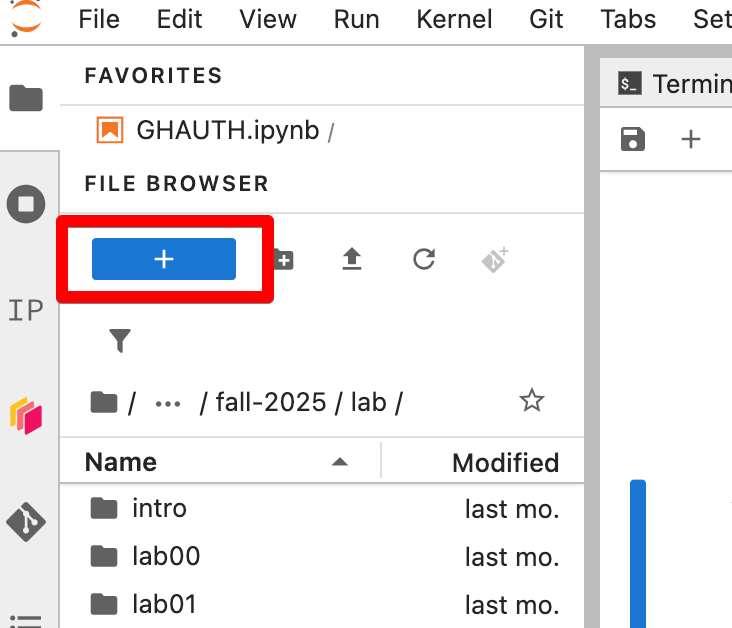

2. Click MyST Build
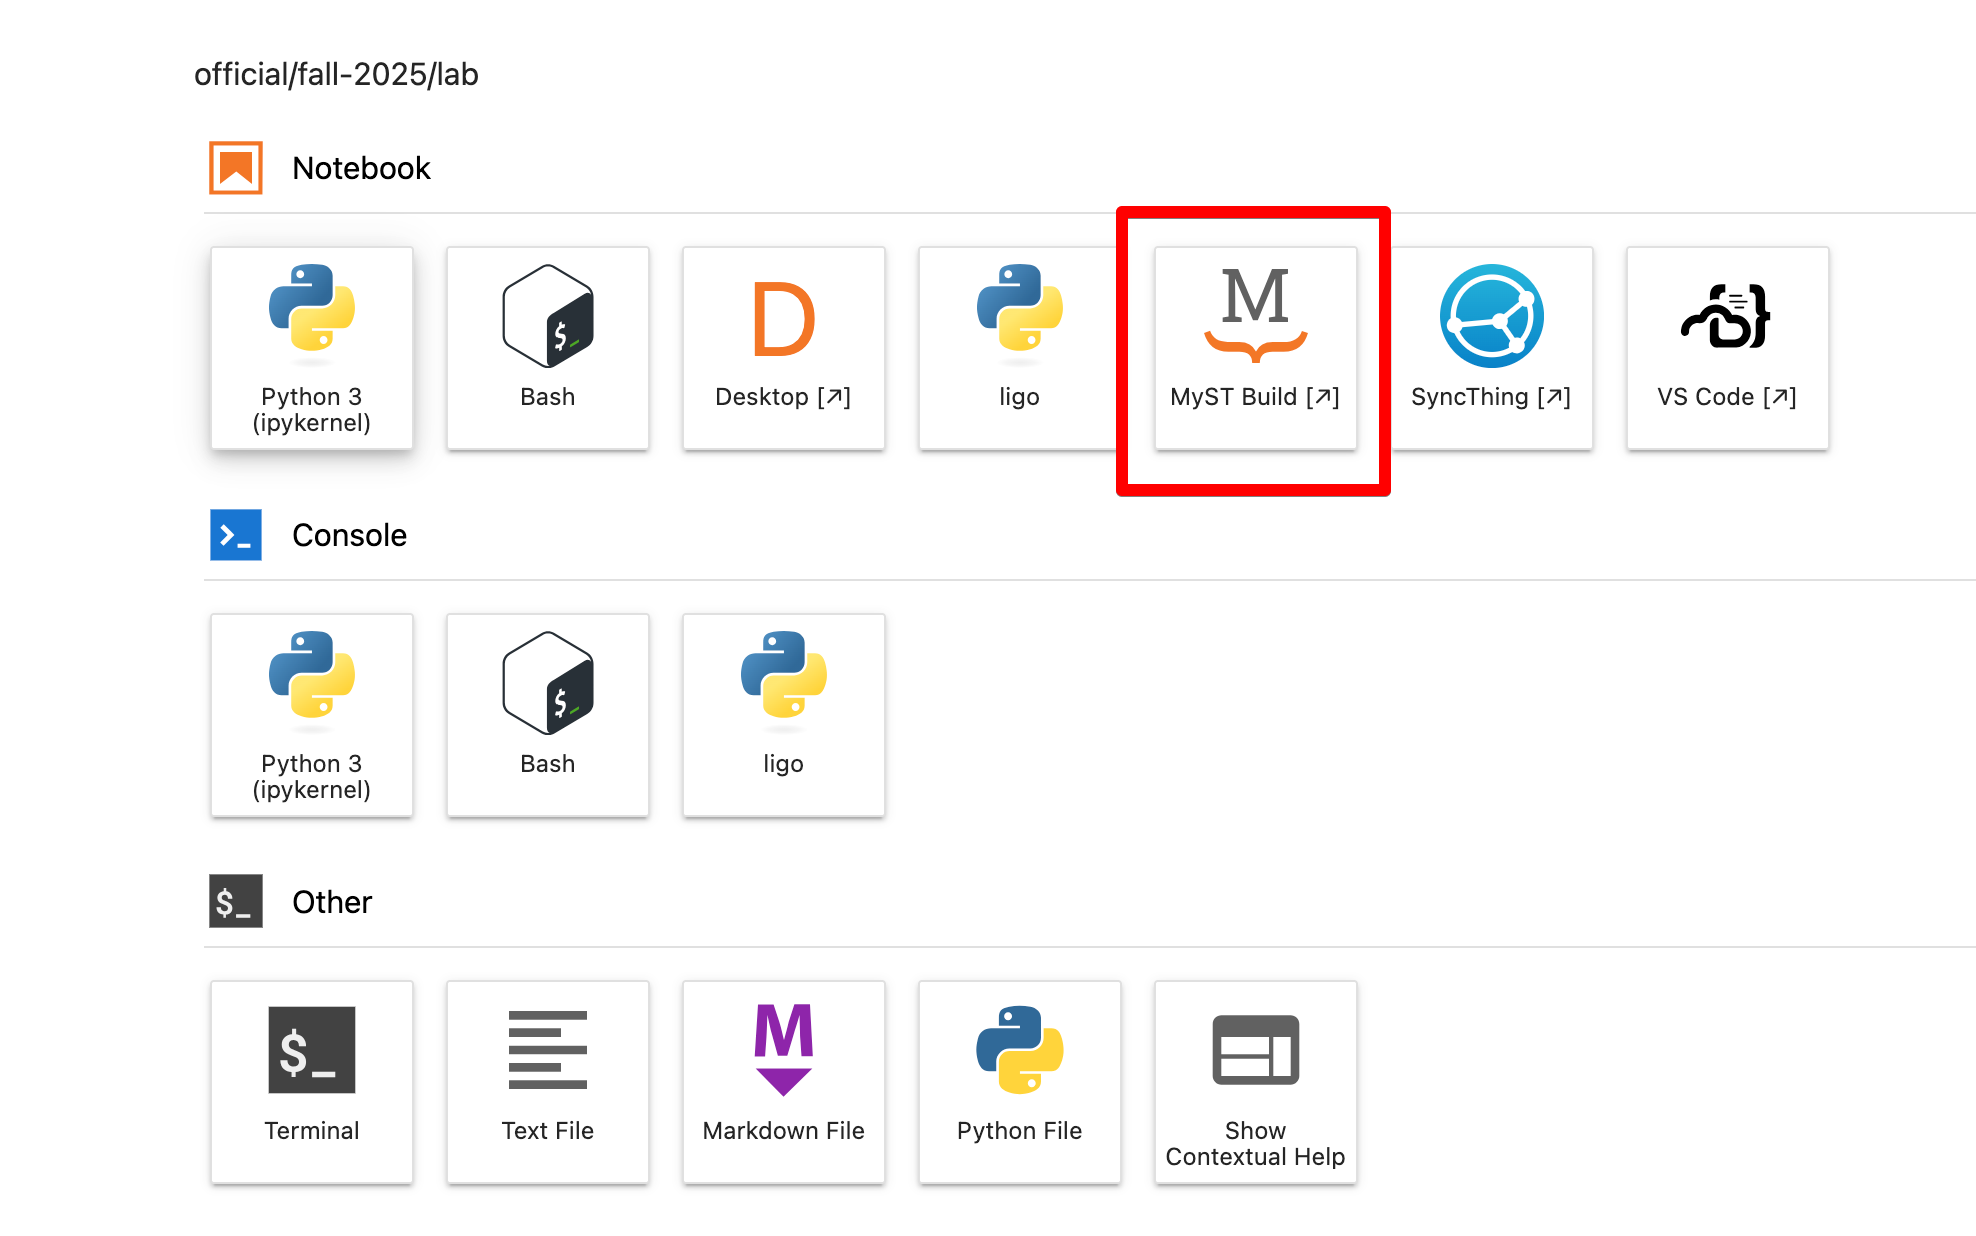

3. A new tab will open. Navigate to the directory that contains your MyST project. *Note: all directories that are MyST projects will be indicated as such*
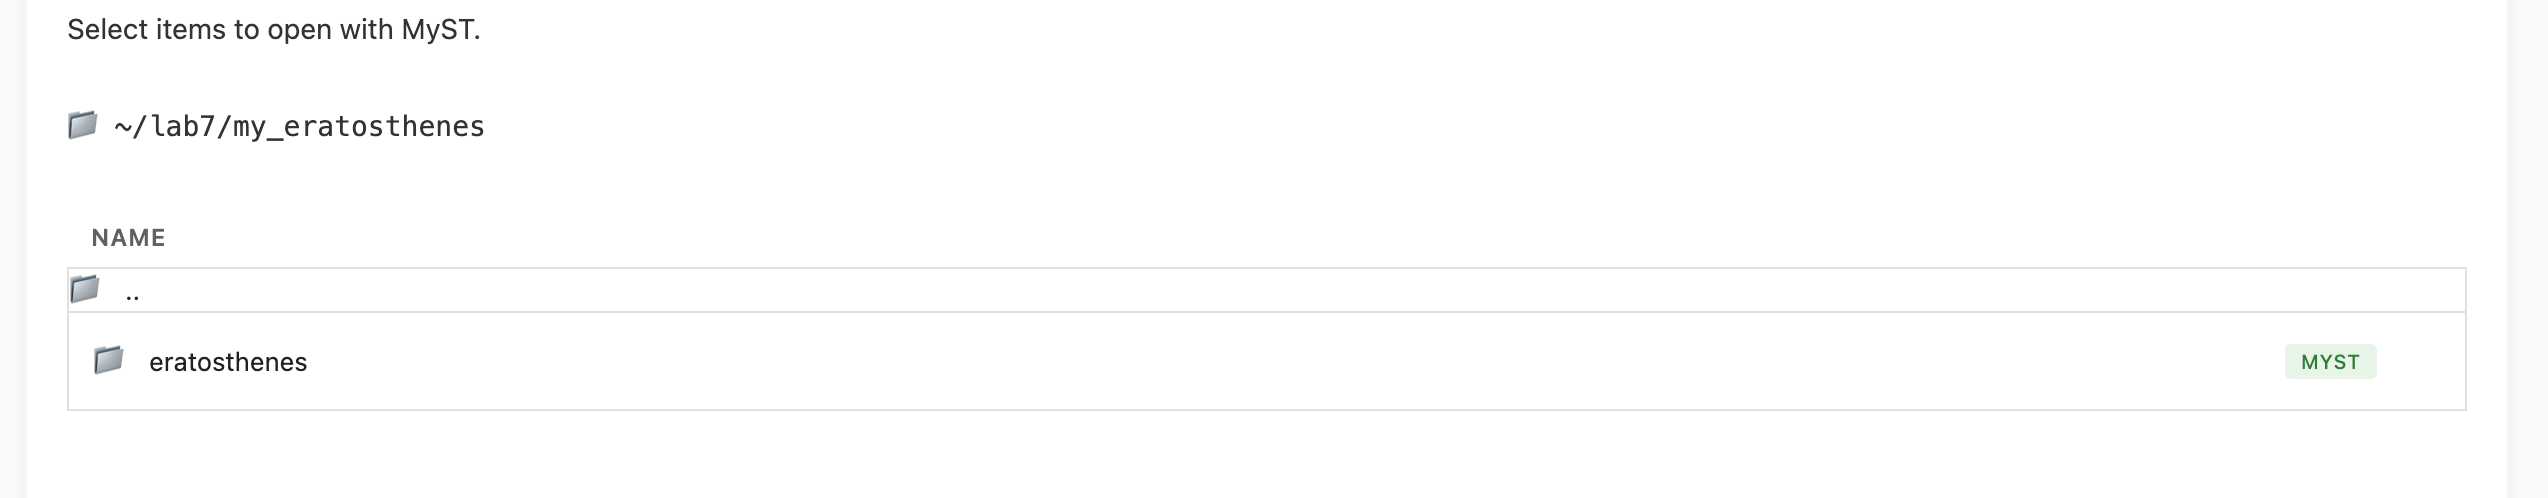

4. If you've made some changes since your last website build, hover over the directory and click the 'Rebuild Site' icon. If you'd like to look at the version that's already been build, just click the directory
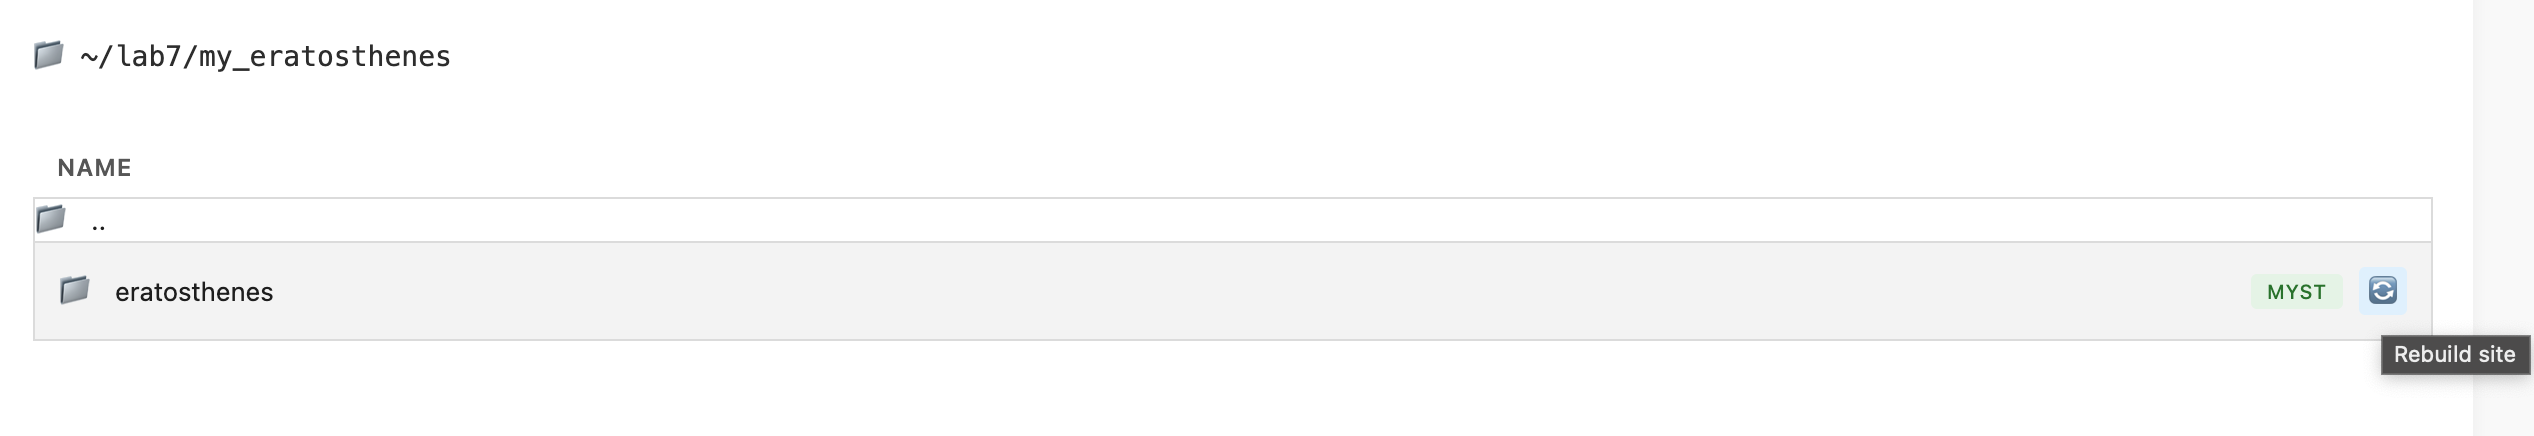

Now, you have a local deployment of your site! Navigate around at your leisure.

### Taking all the content in

Let's take a second to look at what just happened. The main landing page of the website the `README.md` file, rendered in a similar way as in GitHub. On the lefthand side, we see a table of contents, and the tab is actually the `Eratosthenes.ipynb` notebook we were working with earlier! All other files in the repo appear to be ignored. So, MyST treats `.md` files and `.ipynb` files as renderable content. The headings of our notebook and README became the headings for the tabs on the lefthand side.

Click on the tab with the `Eratosthenes.ipynb`. You'll see a nicely displayed version of our notebook, with all of the output printed cell-by-cell as it existed in the `Eratosthenes.ipynb` file.

### Editing Frontmatter via `myst.yml`

In MyST, *frontmatter* refers to any metadata specifications and options about how the project should behave and render, like a title, a thumbnail for the site, a doi if this is a body of research, a list of authors, etc. Setting this metadata not only controls how our websites and webpages build and display, but also get passed to pdfs if we'd like to export any of our site pages to a pdf!

The MyST documentation provides a [nice list](https://mystmd.org/guide/frontmatter#in-a-myst-yml-file) of frontmatter fields that we can specify in the `myst.yml` file. Navigate to the section titled *available frontmatter fields* in the link to find the list that can be edited.

Let's make some simple edits to the `myst.yml` file:
1. Add an `authors` field and put your name down
2. Add your affiliation
3. Add a title to the `title` field
4. Add the binder link to the `binder` field

Rebuild the website and view your changes locally!

By default, all notebooks and markdown files will be parsed and displayed on our website. If we want some finer-grained control over the table of contents, we will have to add this to our `myst.yml` file, and edit the table of contents as we go along.

1. First, add another markdown file to the project.
2. To automatically add a table of contents section to your `myst.yml` file, indexing all notebooks and markdown files present, type in the terminal `myst init --write-toc`.
3. Verify the `toc` section has been added to the `myst.yml`. Rebuild and review the website.
4. Now, comment out one of the lines in the `toc`. Save and rebuild. What happened to that tab?


:::{note}
You can make manual edits to your `toc` frontmatter field in this way for greater control over what gets built and shown. If you don't mind having all notebooks and markdown files getting built and shown, it's perfectly reasonable to let MyST do the work each time with `myst init --write-toc`. Just make sure you delete the `toc` section each time before calling or else `myst` will tell you the `toc` already exists!
:::

Lastly, let's see how we can get navigable directories in here.

1. First, delete the `toc` section from your `myst.yml`
2. Create another directory, and add your `another.md` folder to it.
3. Recreate the `toc` by running `myst init --write-toc` again.
4. Rebuild and redeploy a local copy of the website.
5. You should now see a tab which you can click into a drop-down menu. That tab is our folder, and the dropdown menu contains all of the files! Check out the `myst.yml` to see how this was specified.

### Bells and Whistles with MyST Markdown

MyST projects render content written using something called *MyST Markdown*, a really cool extension of standard Markdown that supports a lot of really nice functionality in our websites, from figures, math equations, code blocks, callouts, cross-references within a document, and external references. We will merely touch upon a few cool aspects here, but we highly encourage you to check out the [MyST Markdown documentation](https://mystmd.org/guide), it's very well written, very easy to follow, and very comprehensive in showing all that you can do to step your documentation game up.

You can make these changes either to the `README.md` itself, or the other document you created. For the following exercises, we will be referring to the documentation. After doing each one, we encourage you to rebuild the local copy of your website.

1. In *Images, Figures, and Videos*, use the `figure` directive to add the figure at the beach. Take note of the different attributes (`label`, `align`, etc.). Fill in these to your liking.
2. In *Callouts & Admonitions*, add your favorite admonition from Table 1 (i.e. `note`, `attention`, etc.)
3. In *Math & Equations*, add an equation using the `math` directive. Give it a nice label.
4. Using *cross-references*, cross-reference both your figure and equation you created else where in the document. Build the local copy and hover over it on the site. What do you see?

### Citations and Bibliographies

MyST handles citations and bibliographies seamlessly. Let's take [one of our readings](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002802) from last week as an example. Navigate to *Citations and Bibliography*.

1. Navigate to the reading and copy the DOI link.
2. In one of your markdown files, reference this paper by following *Simple Referencing with a DOI Link*. Build and view a local copy of the site. What do you notice?
3. You may be familiar with `BibTeX` files, especially if you have had to cite things in a Latex document. It's usually a file with a `.bib` format, and it specifies line-by-line the metadata associated with each body of work you'd like to cite, along with a tag that you can use to refer to that work in your document. MyST also supports the use of these files. In the `shared` folder for Lab 8, we have provided an example BibTex file with two citations, each from last week's readings. Add this file to your project, and add the `bibliography` frontmatter field to your `myst.yml` file.
4. Reference one of those readings in the body of one of your markdown files, according to one of the specifications in the *Markdown Citations* section.

As it turns out, the `.bib` file we created was actually produced automatically by MyST! After completing Step 2, if you run `myst build --doi-bib`, MyST will automatically create a BibTex file with all of the DOI's you've linked throughout the project as citations!


### Extensible Formatting

One of the beauties of a MyST project is that it's not just a website: it's a low-level, semantically structured representation of a project that can be ported to a website, or to other formats like pdfs, Word documents, etc. Let's make a pdf out of one of our Markdown files (preferably the one in which you added citations so we can see how nicely MyST handles these)!

For this section, the *Documents* tab of the MyST documentation site is very useful, specifically *How to export to PDF*.

Follow the instructions, including adding the right frontmatter section to the markdown document you'd like to export. Run the command and export your pdf. How does it look? How were citations handled?

## Deploying to GitHub Pages (with a GitHub Action)

We've been making local builds of our site, but let's get going to the world wide web! MyST makes it extremely simple to do.

1. Run `myst init --gh-pages`. This will tell MyST that we want to deploy our website to GitHub pages, a service that GitHub runs that allows you to host a website built from a GitHub repo.
2. Say yes to the next two prompts. You will see the second one asks about a `depoy.yml` file. This is a GitHub Action like we saw with testing, except this one instructs GitHub to redeploy our site every time we push. Follow the remaining instructions that MyST so nicely printed out in the terminal, and then visit your website at the link they provided.